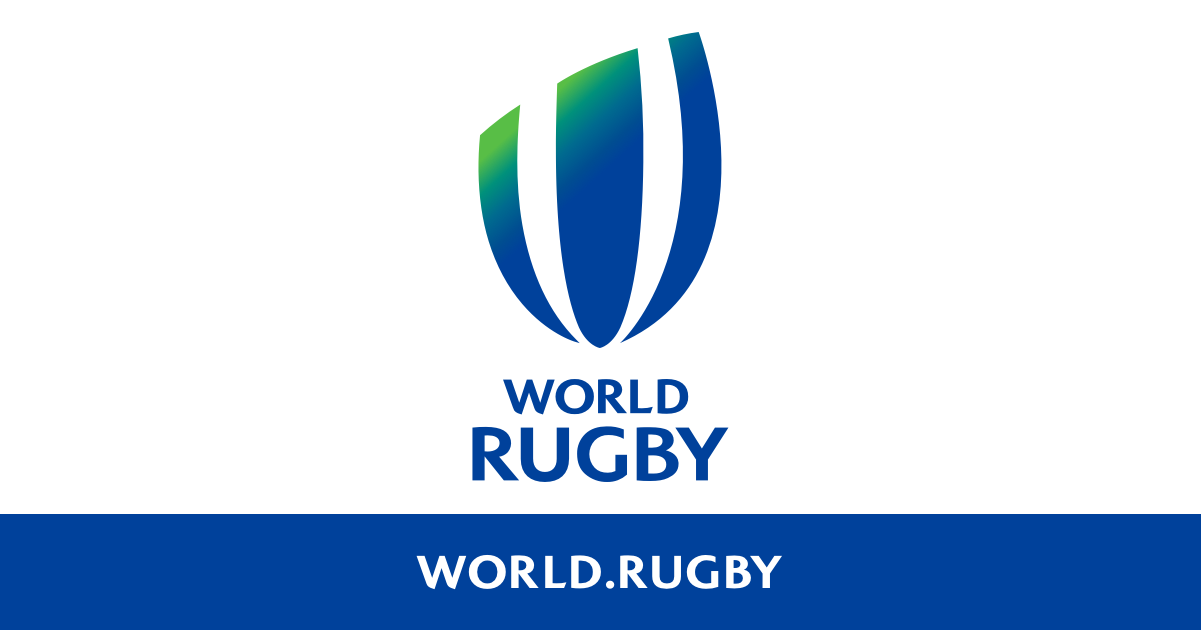

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from bs4 import BeautifulSoup
import requests

import datetime
import re

import warnings
warnings.filterwarnings("ignore")

## Importing & Exploring Initial Raw Data

In [2]:
wru = pd.read_csv("world_rugby_results.csv")
wru.shape

(2783, 11)

In [3]:
wru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2783 entries, 0 to 2782
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         2783 non-null   object
 1   home_team    2783 non-null   object
 2   away_team    2783 non-null   object
 3   home_score   2783 non-null   int64 
 4   away_score   2783 non-null   int64 
 5   competition  2760 non-null   object
 6   stadium      2783 non-null   object
 7   city         2783 non-null   object
 8   country      2783 non-null   object
 9   neutral      2783 non-null   bool  
 10  world_cup    2783 non-null   bool  
dtypes: bool(2), int64(2), object(7)
memory usage: 201.2+ KB


In [4]:
wru.head()

,date,home_team,away_team,home_score,away_score,competition,stadium,city,country,neutral,world_cup
0,1871-03-27,Scotland,England,1,0,1871 Scotland v England International,Raeburn Place,Edinburgh,Scotland,False,False
1,1872-02-05,England,Scotland,2,1,1871–72 Home Nations International,The Oval,London,England,False,False
2,1873-03-03,Scotland,England,0,0,1872–73 Home Nations International,West of Scotland F.C.,Glasgow,Scotland,False,False
3,1874-02-23,England,Scotland,1,0,1873–74 Home Nations International,The Oval,London,England,False,False
4,1875-02-15,England,Ireland,2,0,1874–75 Home Nations rugby union matches,The Oval,London,England,False,False


In [5]:
wru.tail()

,date,home_team,away_team,home_score,away_score,competition,stadium,city,country,neutral,world_cup
2778,2024-07-13,Argentina,France,33,25,2024 France tour of Argentina,José Amalfitani Stadium,Buenos Aires,Argentina,False,False
2779,2024-08-10,Australia,South Africa,7,33,2024 Rugby Championship,Suncorp Stadium,Brisbane,Australia,False,False
2780,2024-08-10,New Zealand,Argentina,30,38,2024 Rugby Championship,Wellington Regional Stadium,Wellington,New Zealand,False,False
2781,2024-08-17,New Zealand,Argentina,42,10,2024 Rugby Championship,Eden Park,Auckland,New Zealand,True,False
2782,2024-08-17,Australia,South Africa,12,30,2024 Rugby Championship,Optus Stadium,Perth,Australia,False,False


In [6]:
# Adding missing matches of 2024:
missing_matches = {"date":["2024-08-01", "2024-08-31", "2024-09-07", "2024-09-07", "2024-09-21", "2024-09-21", "2024-09-28", "2024-09-28", "2024-11-02", "2024-11-08", "2024-11-09",
                           "2024-11-09", "2024-11-10", "2024-11-15", "2024-11-16", "2024-11-16", "2024-11-17", "2024-11-22", "2024-11-23", "2024-11-23", "2024-11-24", "2024-11-30"],

                   "home_team":["Argentina", "South Africa", "South Africa", "Argentina", "Australia", "Argentina", "New Zealand", "South Africa", "England", "Ireland", "England",
                                "Italy", "Scotland", "Ireland", "England", "France", "Wales", "France", "Wales", "Italy", "Scotland", "Ireland"],

                   "away_team":["Australia", "New Zealand", "New Zealand", "Australia", "New Zealand", "South Africa", "Australia", "Argentina", "New Zealand", "New Zealand", "Australia",
                                "Argentina", "South Africa", "Argentina", "South Africa", "New Zealand", "Australia", "Argentina", "South Africa", "New Zealand", "Australia", "Australia"],

                   "home_score":[19, 31, 18, 67, 28, 29, 33, 48, 22, 13, 37,
                                 18, 15, 22, 20, 30, 20, 37, 12, 11, 27, 22],

                   "away_score":[20, 27, 12, 27, 31, 28, 13, 7, 24, 23, 42,
                                 50, 32, 19, 29, 29, 52, 23, 45, 29, 13, 19],

                   "competition":["Rugby Championship", "Rugby Championship", "Rugby Championship", "Rugby Championship", "Rugby Championship", "Rugby Championship", 
                                  "Rugby Championship", "Rugby Championship", "Test Matches", "Test Matches", "Test Matches", "Test Matches", "Test Matches", "Test Matches",
                                  "Test Matches", "Test Matches", "Test Matches", "Test Matches", "Test Matches", "Test Matches", "Test Matches", "Test Matches"],

                   "stadium":["Estadio Jorge Luis Hirschi", "Ellis Park", "Cape Town Stadium", "El Cementario de los Elefantes", "Accor Stadium", "Estadio Único Madre de Ciudades", "Sky Stadium",
                              "Mbombela Stadium", "Allianz Stadium Twickenham", "Aviva Stadium", "Allianz Stadium Twickenham", "Bluenergy Stadium", "Scottish Gas Murrayfield", "Aviva Stadium",
                              "Allianz Stadium Twickenham", "Stade de France", "Principality Stadium", "Stade de France", "Principality Stadium", "Allianz Stadium Juventus", "Scottish Gas Murrayfield", "Aviva Stadium"],

                   "city":["La Plata", "Johannesburg", "Cape Town", "Santa Fe", "Sydney", "Santiago del Estero", "Wellington", "Mbombela", "London", "Dublin", "London",
                           "Udine", "Edinburgh", "Dublin", "London", "Saint-Denis", "Cardiff", "Saint-Denis", "Cardiff", "Turin", "Edinburgh", "Dublin"],

                   "country":["Argentina", "South Africa", "South Africa", "Argentina", "Australia", "Argentina", "New Zealand", "South Africa", "England", "Ireland", "England",
                              "Italy", "Scotland", "Ireland", "England", "France", "Wales", "France", "Wales", "Italy", "Scotland", "Ireland"],

                   "neutral":[False, False, False, False, False, False, False, False, False, False, False,
                              False, False, False, False, False, False, False, False, False, False, False],

                   "world_cup":[False, False, False, False, False, False, False, False, False, False, False,
                                False, False, False, False, False, False, False, False, False, False, False]
                   }

extra_matches = pd.DataFrame(missing_matches)

wru = pd.concat([wru, extra_matches], ignore_index=True)

In [7]:
# Creating a new column "score_diff":
wru["score_diff"] = wru["home_score"]-wru["away_score"]

In [8]:
wru.describe()

,home_score,away_score,score_diff
count,2805.000000,2805.000000,2805.000000
mean,18.865241,15.726203,3.139037
std,13.421737,11.485240,16.528687
min,0.000000,0.000000,-64.000000
25%,9.000000,7.000000,-5.000000
50%,17.000000,14.000000,3.000000
75%,26.000000,22.000000,11.000000
max,101.000000,70.000000,101.000000


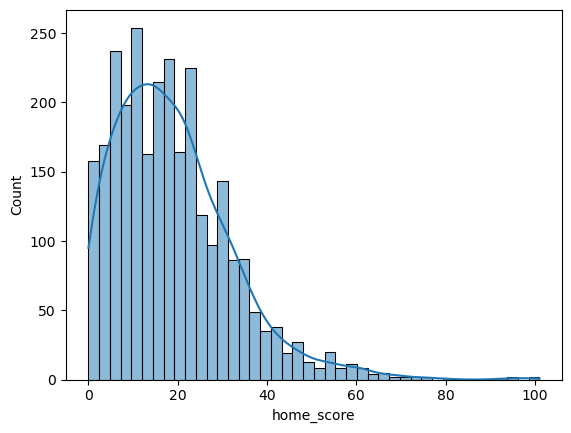

In [9]:
sns.histplot(wru["home_score"], kde=True)

plt.show()

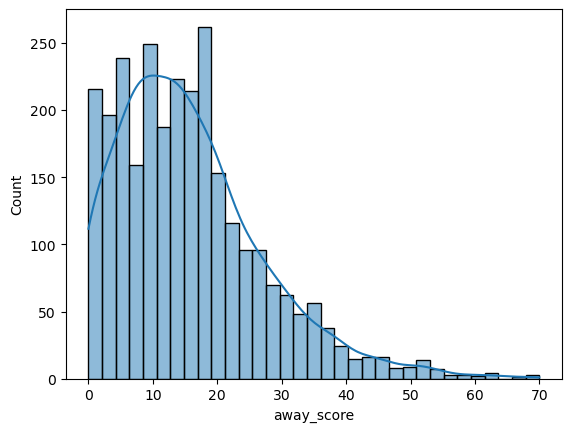

In [10]:
sns.histplot(wru["away_score"], kde=True)

plt.show()

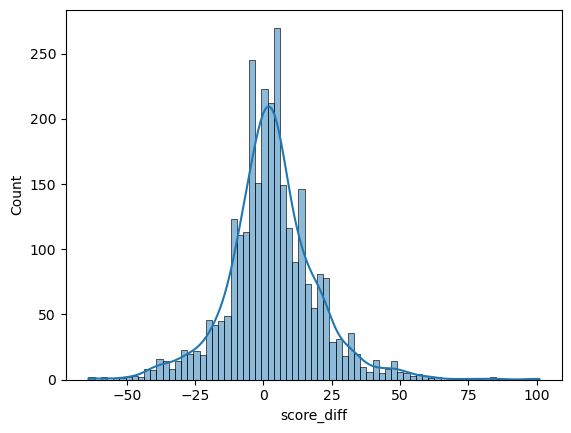

In [11]:
sns.histplot(wru["score_diff"], kde=True)

plt.show()

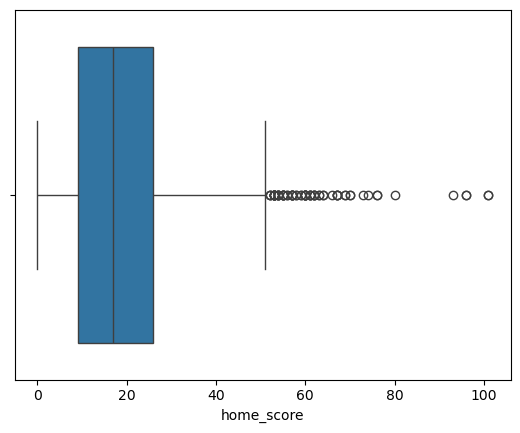

In [12]:
sns.boxplot(x=wru["home_score"])
plt.show()

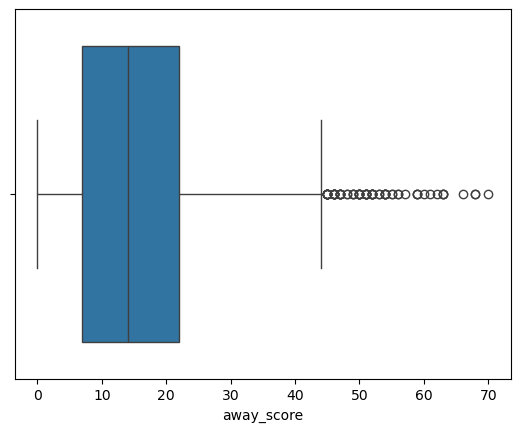

In [13]:
sns.boxplot(x=wru["away_score"])
plt.show()

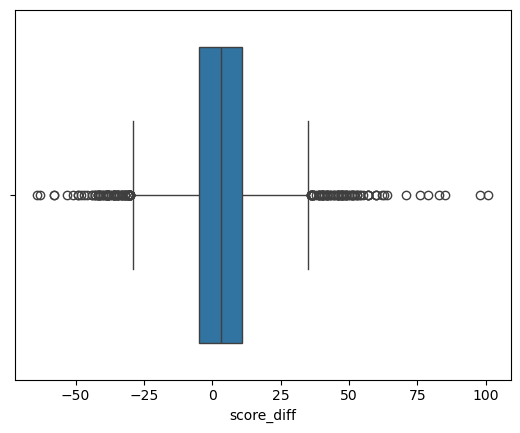

In [14]:
sns.boxplot(x=wru["score_diff"])
plt.show()

In [15]:
wru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         2805 non-null   object
 1   home_team    2805 non-null   object
 2   away_team    2805 non-null   object
 3   home_score   2805 non-null   int64 
 4   away_score   2805 non-null   int64 
 5   competition  2782 non-null   object
 6   stadium      2805 non-null   object
 7   city         2805 non-null   object
 8   country      2805 non-null   object
 9   neutral      2805 non-null   bool  
 10  world_cup    2805 non-null   bool  
 11  score_diff   2805 non-null   int64 
dtypes: bool(2), int64(3), object(7)
memory usage: 224.7+ KB


In [16]:
wru.describe()

,home_score,away_score,score_diff
count,2805.000000,2805.000000,2805.000000
mean,18.865241,15.726203,3.139037
std,13.421737,11.485240,16.528687
min,0.000000,0.000000,-64.000000
25%,9.000000,7.000000,-5.000000
50%,17.000000,14.000000,3.000000
75%,26.000000,22.000000,11.000000
max,101.000000,70.000000,101.000000


In [17]:
wru["stadium"].value_counts()

stadium
Twickenham                      234
Lansdowne Road                  229
Murrayfield Stadium             176
Millennium Stadium              134
National Stadium                116
                               ... 
Welford Road Stadium              1
Stadium Nord Lille Métropole      1
Stade de la Meinau                1
Stadium Lille-Metropole           1
Allianz Stadium Juventus          1
Name: count, Length: 246, dtype: int64

In [18]:
wru["stadium"].nunique()

246

In [19]:
wru["competition"].value_counts()

competition
2024 Six Nations Championship                               15
2023 Rugby World Cup                                        15
2023 Six Nations Championship                               15
Test Matches                                                14
2011 Six Nations Championship                               14
                                                            ..
2004 end-of-year internationals                              1
1986 Italy tour of Australia                                 1
1986 France tour of Argentina, Australia and New Zealand     1
1986 France tour                                             1
1871 Scotland v England International                        1
Name: count, Length: 801, dtype: int64

In [20]:
wru["competition"].nunique()

801

In [21]:
wru["country"].value_counts()

country
England          398
Wales            363
France           351
Ireland          347
Scotland         345
Australia        272
New Zealand      250
South Africa     212
Argentina        129
Italy            117
Japan             15
United States      3
Hong Kong          2
Singapore          1
Name: count, dtype: int64

## WebScraping Stadiums' Capacities (***BeautifulSoup***)
### Website -> https://stadiumdb.com/

In [22]:
# Looking for Stadiums Capacity - Argentina:
urlarg = "https://stadiumdb.com/stadiums/arg"
requests.get(urlarg)
response = requests.get(urlarg)
souparg = BeautifulSoup(response.content, "html.parser")


stadium_arg = []
for i in souparg.find_all("td")[0::4]:
    stadium_arg.append(i.get_text().replace("\n","").strip())

city_arg = []
for i in souparg.find_all("td")[1::4]:
    city_arg.append(i.get_text().replace("\n","").strip())

capacity_arg = []
for i in souparg.find_all("td", class_="figure"):
    capacity_arg.append(i.get_text().replace("\n","").replace("\t",""))


stadiums_arg = pd.DataFrame({"stadium_name":stadium_arg, "stadium_city":city_arg, "stadium_capacity":capacity_arg})
stadiums_arg


,stadium_name,stadium_city,stadium_capacity
0,Mâs Monumental,Buenos Aires,84 567
1,La Bombonera,Buenos Aires,54 000
2,Estadio Ciudad de La Plata,La Plata,53 000
3,Estadio José Amalfitani,Buenos Aires,49 540
4,Estadio Tomás Adolfo Ducó,Buenos Aires,48 314
5,Estadio Libertadores de América,Avellaneda,48 069
6,El Nuevo Gasómetro,Buenos Aires,47 964
7,Estadio Néstor Díaz Pérez,Lanús,46 519
8,El Cementario de los Elefantes,Santa Fe,45 000
9,Estadio Presidente Perón,Avellaneda,42 500


In [23]:
# Looking for Stadiums Capacity - Australia:
urlaus = "https://stadiumdb.com/stadiums/aus"
requests.get(urlaus)
response = requests.get(urlaus)
soupaus = BeautifulSoup(response.content, "html.parser")


stadium_aus = []
for i in soupaus.find_all("td")[0::4]:
    stadium_aus.append(i.get_text().replace("\n","").strip().replace("Allianz Stadium", "Sydney Football Stadium").replace("SOP Athletic Centre","Concord Oval"))

city_aus = []
for i in soupaus.find_all("td")[1::4]:
    city_aus.append(i.get_text().replace("\n","").strip())

capacity_aus = []
for i in soupaus.find_all("td", class_="figure"):
    capacity_aus.append(i.get_text().replace("\n","").replace("\t",""))


stadiums_aus = pd.DataFrame({"stadium_name":stadium_aus, "stadium_city":city_aus, "stadium_capacity":capacity_aus})
stadiums_aus

,stadium_name,stadium_city,stadium_capacity
0,Marvel Stadium,Melbourne,56 347
1,Suncorp Stadium,Brisbane,53 223
2,Sydney Football Stadium,Sydney,42 500
3,GMHBA Stadium,Geelong,34 074
4,McDonald Jones Stadium,Newcastle,33 000
5,AAMI Park,Melbourne,30 050
6,CommBank Stadium,Sydney,30 000
7,Cbus Super Stadium,Robina,27 400
8,Bluetongue Stadium,Gosford,20 059
9,Campbelltown Stadium,Leumeah,17 500


In [24]:
# Looking for Stadiums Capacity - England:
urleng = "https://stadiumdb.com/stadiums/eng"
requests.get(urleng)
response = requests.get(urleng)
soupeng = BeautifulSoup(response.content, "html.parser")


stadium_eng = []
for i in soupeng.find_all("td")[0::4]:
    stadium_eng.append(i.get_text().replace("\n","").strip().replace("Allianz Stadium", "Allianz Stadium Twickenham").replace("’","'"))

city_eng = []
for i in soupeng.find_all("td")[1::4]:
    city_eng.append(i.get_text().replace("\n","").strip().replace("Newcastle upon Tyne", "Newcastle"))

capacity_eng = []
for i in soupeng.find_all("td", class_="figure"):
    capacity_eng.append(i.get_text().replace("\n","").replace("\t",""))


stadiums_eng = pd.DataFrame({"stadium_name":stadium_eng, "stadium_city":city_eng, "stadium_capacity":capacity_eng})
stadiums_eng

,stadium_name,stadium_city,stadium_capacity
0,Wembley Stadium,London,90 000
1,Old Trafford,Manchester,74 031
2,Tottenham Hotspur Stadium,London,62 850
3,London Stadium,London,62 500
4,Anfield,Liverpool,61 000
...,...,...,...
120,Tameside Stadium,Ashton-under-Lyne,4 000
121,The Dripping Pan,Lewes,3 000
122,DCJ Group Insurance Arena,Matlock,2 757
123,Sheffield Olympic Legacy Park Community Stadium,Sheffield,1 320


In [25]:
# Looking for Stadiums Capacity - France:
urlfra = "https://stadiumdb.com/stadiums/fra"
requests.get(urlfra)
response = requests.get(urlfra)
soupfra = BeautifulSoup(response.content, "html.parser")


stadium_fra = []
for i in soupfra.find_all("td")[0::4]:
    stadium_fra.append(i.get_text().replace("\n","").strip())

city_fra = []
for i in soupfra.find_all("td")[1::4]:
    city_fra.append(i.get_text().replace("\n","").strip())

capacity_fra = []
for i in soupfra.find_all("td", class_="figure"):
    capacity_fra.append(i.get_text().replace("\n","").replace("\t",""))


stadiums_fra = pd.DataFrame({"stadium_name":stadium_fra, "stadium_city":city_fra, "stadium_capacity":capacity_fra})
stadiums_fra

,stadium_name,stadium_city,stadium_capacity
0,Stade de France,Saint-Avold,81 338
1,Orange Vélodrome,Marseille,67 394
2,Groupama Stadium,Lyon,59 186
3,Stade Pierre Mauroy,Lille,50 000
4,Parc des Princes,Paris,47 929
...,...,...,...
61,Stade Guy Piriou,Concarneau,6 500
62,Stade Saint-Avold,Saint-Avold,3 000
63,Stade de l‘Aar,Schiltigheim,2 500
64,Stade Marcel-Saupin,Nantes,1 880


In [26]:
# Looking for Stadiums Capacity - Hong Kong:
urlhkg = "https://stadiumdb.com/stadiums/hkg"
requests.get(urlhkg)
response = requests.get(urlhkg)
souphkg = BeautifulSoup(response.content, "html.parser")


stadium_hkg = []
for i in souphkg.find_all("td")[0::4]:
    stadium_hkg.append(i.get_text().replace("\n","").strip())

city_hkg = []
for i in souphkg.find_all("td")[1::4]:
    city_hkg.append(i.get_text().replace("\n","").strip())

capacity_hkg = []
for i in souphkg.find_all("td", class_="figure"):
    capacity_hkg.append(i.get_text().replace("\n","").replace("\t",""))


stadiums_hkg = pd.DataFrame({"stadium_name":stadium_hkg, "stadium_city":city_hkg, "stadium_capacity":capacity_hkg})
stadiums_hkg

,stadium_name,stadium_city,stadium_capacity
0,Hong Kong Stadium,Hong Kong,40 000


In [27]:
# Looking for Stadiums Capacity - Ireland:
urlirl = "https://stadiumdb.com/stadiums/irl"
requests.get(urlirl)
response = requests.get(urlirl)
soupirl = BeautifulSoup(response.content, "html.parser")


stadium_irl = []
for i in soupirl.find_all("td")[0::4]:
    stadium_irl.append(i.get_text().replace("\n","").strip())

city_irl = []
for i in soupirl.find_all("td")[1::4]:
    city_irl.append(i.get_text().replace("\n","").strip())

capacity_irl = []
for i in soupirl.find_all("td", class_="figure"):
    capacity_irl.append(i.get_text().replace("\n","").replace("\t",""))


stadiums_irl = pd.DataFrame({"stadium_name":stadium_irl, "stadium_city":city_irl, "stadium_capacity":capacity_irl})
stadiums_irl

,stadium_name,stadium_city,stadium_capacity
0,Aviva Stadium,Dublin,51 700
1,Tallaght Stadium,Tallaght,10 000
2,Turners Cross Stadium,Cork,7 485
3,Dalymount Park,Dublin,4 227
4,The Showgrounds,Sligo,4 000
5,Croke Park,Dublin,82 300
6,Thomond Park,Limerick,25 630
7,Flancare Park,Longford,6 850
8,Tolka Park,Dublin,6 000


In [28]:
# Looking for Stadiums Capacity - Italy:
urlita = "https://stadiumdb.com/stadiums/ita"
requests.get(urlita)
response = requests.get(urlita)
soupita = BeautifulSoup(response.content, "html.parser")


stadium_ita = []
for i in soupita.find_all("td")[0::4]:
    stadium_ita.append(i.get_text().replace("\n","").strip().replace("Stadio Marcantonio Bentegodi", "Stadio Marc'Antonio Bentegodi").replace("Allianz Stadium", "Allianz Stadium Juventus").replace("’","'"))

city_ita = []
for i in soupita.find_all("td")[1::4]:
    city_ita.append(i.get_text().replace("\n","").strip())

capacity_ita = []
for i in soupita.find_all("td", class_="figure"):
    capacity_ita.append(i.get_text().replace("\n","").replace("\t",""))


stadiums_ita = pd.DataFrame({"stadium_name":stadium_ita, "stadium_city":city_ita, "stadium_capacity":capacity_ita})
stadiums_ita

,stadium_name,stadium_city,stadium_capacity
0,Stadio San Siro,Milan,75 817
1,Stadio Olimpico,Rome,70 634
2,Stadio Diego Armando Maradona,Naples,54 732
3,Allianz Stadium Juventus,Turin,41 507
4,Stadio Marc'Antonio Bentegodi,Verona,39 211
...,...,...,...
62,Stadio Silvio Piola,Vercelli,4 200
63,Stadio Vito Simone Veneziani,Monopoli,4 177
64,Stadio Aldo e Dino Ballarin,Chioggia,3 000
65,Campo Sportivo Comunale Antonio Antonucci,Bitetto,1 500


In [29]:
# Renaming "stadium_name" "Stadio Artemio Franchi - Siena" [52] to avoid duplicity with "Stadio Artemio Franchi - Florence":
stadiums_ita["stadium_name"][52] = stadiums_ita["stadium_name"][52].replace("Stadio Artemio Franchi", "Stadio Artemio Franchi - Siena")

In [30]:
# Looking for Stadiums Capacity - Japan:
urljpn = "https://stadiumdb.com/stadiums/jpn"
requests.get(urljpn)
response = requests.get(urljpn)
soupjpn = BeautifulSoup(response.content, "html.parser")


stadium_jpn = []
for i in soupjpn.find_all("td")[0::4]:
    stadium_jpn.append(i.get_text().replace("\n","").strip())

city_jpn = []
for i in soupjpn.find_all("td")[1::4]:
    city_jpn.append(i.get_text().replace("\n","").strip())

capacity_jpn = []
for i in soupjpn.find_all("td", class_="figure"):
    capacity_jpn.append(i.get_text().replace("\n","").replace("\t",""))


stadiums_jpn = pd.DataFrame({"stadium_name":stadium_jpn, "stadium_city":city_jpn, "stadium_capacity":capacity_jpn})
stadiums_jpn

,stadium_name,stadium_city,stadium_capacity
0,Japan National Stadium,Tokyo,68 000
1,Nissan Stadium,Yokohama,72 327
2,Saitama Stadium,Urawa,63 718
3,Universiade Stadium,Kobe,60 000
4,Ecopa Stadium,Fukuroi,50 889
5,Ajinomoto Stadium,Chōfu,50 100
6,Hot Staff Field Hiroshima,Hiroszima,45 000
7,Toyota Stadium,Toyota,44 380
8,Denka Big Swan Stadium,Niigata,42 279
9,Kashima Stadium,Kashima,40 728


In [31]:
# Looking for Stadiums Capacity - New Zealand:
urlnzl = "https://stadiumdb.com/stadiums/nzl"
requests.get(urlnzl)
response = requests.get(urlnzl)
soupnzl = BeautifulSoup(response.content, "html.parser")


stadium_nzl = []
for i in soupnzl.find_all("td")[0::4]:
    stadium_nzl.append(i.get_text().replace("\n","").strip())

city_nzl = []
for i in soupnzl.find_all("td")[1::4]:
    city_nzl.append(i.get_text().replace("\n","").strip())

capacity_nzl = []
for i in soupnzl.find_all("td", class_="figure"):
    capacity_nzl.append(i.get_text().replace("\n","").replace("\t",""))


stadiums_nzl = pd.DataFrame({"stadium_name":stadium_nzl, "stadium_city":city_nzl, "stadium_capacity":capacity_nzl})
stadiums_nzl

,stadium_name,stadium_city,stadium_capacity
0,Eden Park,Auckland,50 000
1,Sky Stadium,Wellington,36 000
2,Forsyth Barr Stadium,Dunedin,30 748
3,FMG Stadium Waikato,Hamilton,25 000


In [32]:
# Looking for Stadiums Capacity - Scotland:
urlsco = "https://stadiumdb.com/stadiums/sco"
requests.get(urlsco)
response = requests.get(urlsco)
soupsco = BeautifulSoup(response.content, "html.parser")


stadium_sco = []
for i in soupsco.find_all("td")[0::4]:
    stadium_sco.append(i.get_text().replace("\n","").strip())

city_sco = []
for i in soupsco.find_all("td")[1::4]:
    city_sco.append(i.get_text().replace("\n","").strip())

capacity_sco = []
for i in soupsco.find_all("td", class_="figure"):
    capacity_sco.append(i.get_text().replace("\n","").replace("\t",""))


stadiums_sco = pd.DataFrame({"stadium_name":stadium_sco, "stadium_city":city_sco, "stadium_capacity":capacity_sco})
stadiums_sco

,stadium_name,stadium_city,stadium_capacity
0,Hampden Park,Glasgow,51 866
1,Celtic Park,Glasgow,60 832
2,Ibrox Stadium,Glasgow,50 817
3,Pittodrie Stadium,Aberdeen,20 961
4,Easter Road Stadium,Edinburgh,20 421
5,Tynecastle Park,Edinburgh,19 852
6,Rugby Park,Kilmarnock,18 128
7,Fir Park,Motherwell,13 742
8,McDiarmid Park,Perth,10 723
9,Tony Macaroni Arena,Livingston,9 521


In [33]:
# Looking for Stadiums Capacity - Singapore:
urlsin = "https://stadiumdb.com/stadiums/sin"
requests.get(urlsin)
response = requests.get(urlsin)
soupsin = BeautifulSoup(response.content, "html.parser")


stadium_sin = []
for i in soupsin.find_all("td")[0::4]:
    stadium_sin.append(i.get_text().replace("\n","").strip())

city_sin = []
for i in soupsin.find_all("td")[1::4]:
    city_sin.append(i.get_text().replace("\n","").strip())

capacity_sin = []
for i in soupsin.find_all("td", class_="figure"):
    capacity_sin.append(i.get_text().replace("\n","").replace("\t",""))


stadiums_sin = pd.DataFrame({"stadium_name":stadium_sin, "stadium_city":city_sin, "stadium_capacity":capacity_sin})
stadiums_sin

,stadium_name,stadium_city,stadium_capacity
0,Singapore National Stadium,Singapore,55 000
1,The Float @ Marina Bay,Singapore,30 000
2,Jalan Besar Stadium,Singapore,6 000
3,Choa Chu Kang Stadium,Singapore,4 000


In [34]:
# Looking for Stadiums Capacity - South Africa:
urlrsa = "https://stadiumdb.com/stadiums/rsa"
requests.get(urlrsa)
response = requests.get(urlrsa)
souprsa = BeautifulSoup(response.content, "html.parser")


stadium_rsa = []
for i in souprsa.find_all("td")[0::4]:
    stadium_rsa.append(i.get_text().replace("\n","").strip().replace("Newlands Stadium","Newlands"))

city_rsa = []
for i in souprsa.find_all("td")[1::4]:
    city_rsa.append(i.get_text().replace("\n","").strip())

capacity_rsa = []
for i in souprsa.find_all("td", class_="figure"):
    capacity_rsa.append(i.get_text().replace("\n","").replace("\t",""))


stadiums_rsa = pd.DataFrame({"stadium_name":stadium_rsa, "stadium_city":city_rsa, "stadium_capacity":capacity_rsa})
stadiums_rsa

,stadium_name,stadium_city,stadium_capacity
0,FNB Stadium,Johannesburg,94 736
1,Cape Town Stadium,Cape Town,55 000
2,Nelson Mandela Bay Stadium,Gqeberha,48 459
3,Vodacom Park,Bloemfontein,48 000
4,Royal Bafokeng Stadium,Phokeng,44 530
5,Orlando Stadium,Orlando,40 000
6,Lucas Moripe Stadium,Atteridgeville,28 900
7,Rand Stadium,Rosettenville,25 000
8,Bidvest Stadium,Johannesburg,5 000
9,Ellis Park,Johannesburg,62 567


In [35]:
# Looking for Stadiums Capacity - United States:
urlusa = "https://stadiumdb.com/stadiums/usa"
requests.get(urlusa)
response = requests.get(urlusa)
soupusa = BeautifulSoup(response.content, "html.parser")


stadium_usa = []
for i in soupusa.find_all("td")[0::4]:
    stadium_usa.append(i.get_text().replace("\n","").strip().replace("Nissan Stadium","Nissan Stadium - NFL"))

city_usa = []
for i in soupusa.find_all("td")[1::4]:
    city_usa.append(i.get_text().replace("\n","").strip())

capacity_usa = []
for i in soupusa.find_all("td", class_="figure"):
    capacity_usa.append(i.get_text().replace("\n","").replace("\t",""))


stadiums_usa = pd.DataFrame({"stadium_name":stadium_usa, "stadium_city":city_usa, "stadium_capacity":capacity_usa})
stadiums_usa

,stadium_name,stadium_city,stadium_capacity
0,Bank of America Stadium,Charlotte,75 412
1,Mercedes-Benz Stadium,Atlanta,71 000
2,Lumen Field,Seattle,68 740
3,Gillette Stadium,Foxborough,65 878
4,Soldier Field,Chicago,61 500
...,...,...,...
135,Coach Kenny Deel Stadium,Melissa,10 000
136,NSC Stadium,Blaine,8 500
137,Toyota Field,San Antonio,8 296
138,Al Lang Stadium,Saint Petersburg,7 500


In [36]:
# Looking for Stadiums Capacity - Wales:
urlwal = "https://stadiumdb.com/stadiums/wal"
requests.get(urlwal)
response = requests.get(urlwal)
soupwal = BeautifulSoup(response.content, "html.parser")


stadium_wal = []
for i in soupwal.find_all("td")[0::4]:
    stadium_wal.append(i.get_text().replace("\n","").strip())

city_wal = []
for i in soupwal.find_all("td")[1::4]:
    city_wal.append(i.get_text().replace("\n","").strip())

capacity_wal = []
for i in soupwal.find_all("td", class_="figure"):
    capacity_wal.append(i.get_text().replace("\n","").replace("\t",""))


stadiums_wal = pd.DataFrame({"stadium_name":stadium_wal, "stadium_city":city_wal, "stadium_capacity":capacity_wal})
stadiums_wal

,stadium_name,stadium_city,stadium_capacity
0,Cardiff City Stadium,Cardiff,33 280
1,Swansea.com Stadium,Swansea,21 000
2,Principality Stadium,Cardiff,73 931
3,Parc y Scarlets,Llanelli,14 870
4,Racecourse Ground,Wrexham,10 771
5,Park Avenue,Aberystwyth,5 000
6,Bangor University Stadium,Bangor,3 000


In [37]:
# Looking for Stadiums Capacity - Northern Ireland:
urlnir = "https://stadiumdb.com/stadiums/nir"
requests.get(urlnir)
response = requests.get(urlnir)
soupnir = BeautifulSoup(response.content, "html.parser")


stadium_nir = []
for i in soupnir.find_all("td")[0::4]:
    stadium_nir.append(i.get_text().replace("\n","").strip())

city_nir = []
for i in soupnir.find_all("td")[1::4]:
    city_nir.append(i.get_text().replace("\n","").strip())

capacity_nir = []
for i in soupnir.find_all("td", class_="figure"):
    capacity_nir.append(i.get_text().replace("\n","").replace("\t",""))


stadiums_nir = pd.DataFrame({"stadium_name":stadium_nir, "stadium_city":city_nir, "stadium_capacity":capacity_nir})
stadiums_nir

,stadium_name,stadium_city,stadium_capacity
0,Windsor Park,Belfast,18 614
1,Casement Park,Belfast,31 500
2,Kingspan Stadium,Belfast,18 196
3,Solitude,Belfast,6 224
4,The Oval,Belfast,5 056


In [38]:
# Looking for Stadiums Capacity - Historical:         # Some indexes change here!
urlhist = "https://stadiumdb.com/historical"
requests.get(urlhist)
response = requests.get(urlhist)
souphist = BeautifulSoup(response.content, "html.parser")


stadium_hist = []
for i in souphist.find_all("td")[0::5]:
    stadium_hist.append(i.get_text().replace("\n","").strip().replace("Wembley Stadium","Wembley Stadium - Old"))

city_hist = []
for i in souphist.find_all("td")[3::5]:
    city_hist.append(i.get_text().replace("\n","").strip())

capacity_hist = []
for i in souphist.find_all("td", class_="figure"):
    capacity_hist.append(i.get_text().replace("\n","").replace("\t",""))


stadiums_hist = pd.DataFrame({"stadium_name":stadium_hist, "stadium_city":city_hist, "stadium_capacity":capacity_hist})
stadiums_hist

,stadium_name,stadium_city,stadium_capacity
0,Ryan Field,Evanston,47 130
1,Stadion Balgarska Armia,Sofia,22 015
2,Stade Moulay Abdellah,Rabat,53 000
3,Stadionul Farul,Constanţa,15 500
4,Stadionul Nicolae Dobrin,Pitești,15 170
...,...,...,...
143,White City Stadium,London,93 000
144,Estadio Gasómetro,Buenos Aires,75 000
145,Stadio Filadelfia,Turin,30 000
146,Stadio Nazionale,Rome,30 000


In [39]:
final_stadiums = pd.concat([stadiums_arg, stadiums_aus, stadiums_eng, stadiums_fra, stadiums_hkg, stadiums_irl, stadiums_ita, stadiums_jpn, 
                            stadiums_nzl, stadiums_sco, stadiums_sin, stadiums_rsa, stadiums_usa, stadiums_wal, stadiums_nir, stadiums_hist], axis = 0).reset_index(drop=True)

final_stadiums

,stadium_name,stadium_city,stadium_capacity
0,Mâs Monumental,Buenos Aires,84 567
1,La Bombonera,Buenos Aires,54 000
2,Estadio Ciudad de La Plata,La Plata,53 000
3,Estadio José Amalfitani,Buenos Aires,49 540
4,Estadio Tomás Adolfo Ducó,Buenos Aires,48 314
...,...,...,...
726,White City Stadium,London,93 000
727,Estadio Gasómetro,Buenos Aires,75 000
728,Stadio Filadelfia,Turin,30 000
729,Stadio Nazionale,Rome,30 000


In [40]:
final_stadiums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   stadium_name      731 non-null    object
 1   stadium_city      731 non-null    object
 2   stadium_capacity  731 non-null    object
dtypes: object(3)
memory usage: 17.3+ KB


In [41]:
# Converting column "stadium_capacity" to integer:
final_stadiums["stadium_capacity"] = final_stadiums["stadium_capacity"].str.replace(" ","").astype("int64")

In [42]:
final_stadiums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   stadium_name      731 non-null    object
 1   stadium_city      731 non-null    object
 2   stadium_capacity  731 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


## Transforming some Initial Raw Data for Stardardization

In [43]:
# Converting column "date" to Datetime:
wru["date"] = pd.to_datetime(wru["date"])

In [44]:
# Dropping rows before 1987 -> The year of the 1st Rugby World Cup:
cleaned_wru = wru[wru["date"] >= "1987-01-01"].reset_index(drop=True)

In [45]:
# Standardizing -renaming- competitions' names in order to simplify analysis, and get_dummies later on -> "Test Matches", "Six Nations", "Rugby Championship" and "Rugby World Cup":
competition_cleaned = []

for z in cleaned_wru["competition"]:
    if isinstance(z, str) and ("tour" in z or "warm" in z or "Warm" in z or "qualification" in z):
        competition_cleaned.append("Test Matches")

    elif isinstance(z, str) and ("Five Nations" in z or "Six Nations" in z):
        competition_cleaned.append("Six Nations")

    elif isinstance(z, str) and ("Tri Nations" in z or "Rugby Championship" in z):
        competition_cleaned.append("Rugby Championship")
    
    elif isinstance(z, str) and "World Cup" in z:
        competition_cleaned.append("Rugby World Cup")
    
    else:
        competition_cleaned.append("Test Matches")

cleaned_wru["competition_cleaned"] = competition_cleaned

In [46]:
# Standardizing -renaming- stadiums' names to be able to join stadiums' capacity in further steps: 
stadium_name = []

for z in cleaned_wru["stadium"]:
    #1
    if isinstance(z, str) and ("Murrayfield" in z or "Murrayfield" in z):
        stadium_name.append("Scottish Gas Murrayfield")
    #2
    elif isinstance(z,str) and ("Twickenham" in z or "Twickenham Stadium" in z):
        stadium_name.append("Allianz Stadium Twickenham")
    #3
    elif isinstance(z,str) and ("Olympic Stadium" in z):
        stadium_name.append("London Stadium")
    #4
    elif isinstance(z,str) and ("St James Park" in z or "St James' Park" in z):
        stadium_name.append("St. James' Park")
    #5
    elif isinstance(z,str) and ("Welford Road Stadium" in z):
        stadium_name.append("Welford Road")
    #6
    elif isinstance(z,str) and ("Galpharm Stadium" in z or "McAlpine Stadium" in z):
        stadium_name.append("John Smith's Stadium")    
    #7
    elif isinstance(z,str) and ("Stade Vélodrome" in z):
        stadium_name.append("Orange Vélodrome")
    #8
    elif isinstance(z,str) and ("Stadium Lille-Metropole" in z or "Stadium Nord Lille Métropole" in z or "Grand Stade Lille Métropole" in z):
        stadium_name.append("Stade Lille-Métropole")
    #9
    elif isinstance(z,str) and ("Stade Pierre-Mauroy" in z):
        stadium_name.append("Stade Pierre Mauroy")
    #10
    elif isinstance(z,str) and ("Parc Olympique" in z):
        stadium_name.append("Groupama Stadium")
    #11
    elif isinstance(z,str) and ("Stade de Gerland" in z):
        stadium_name.append("Matmut Stadium")
    #12
    elif isinstance(z,str) and ("Stade Municipal" in z or "Parc Lescure" in z):
        stadium_name.append("Stade Chaban-Delmas")
    #13
    elif isinstance(z,str) and ("Stadium Municipal" in z or "Stade du Moulias" in z or "Stade Antoine-Béguère" in z or "Stade Maurice Trélut" in z):
        stadium_name.append("Stadium de Toulouse")
    #14
    elif isinstance(z,str) and ("Stade Lesdiguières" in z):
        stadium_name.append("Stade des Alpes")
    #15
    elif isinstance(z,str) and ("Stade Félix Bollaert" in z):
        stadium_name.append("Stade Bollaert-Delelis")
    #16
    elif isinstance(z,str) and ("Ravenhill Stadium" in z):
        stadium_name.append("Kingspan Stadium")
    #17
    elif isinstance(z,str) and ("Stadium Australia" in z or "Telstra Stadium" in z):
        stadium_name.append("Accor Stadium")
    #18
    elif isinstance(z,str) and ("Bankwest Stadium" in z):
        stadium_name.append("CommBank Stadium")
    #19
    elif isinstance(z,str) and ("Sydney Cricket Ground" in z):
        stadium_name.append("Sydney Football Stadium")
    #20
    elif isinstance(z,str) and ("Docklands Stadium" in z or "Colonial Stadium" in z or "Telstra Dome" in z):
        stadium_name.append("Marvel Stadium")
    #21
    elif isinstance(z,str) and ("Melbourne Rectangular Stadium" in z or "Melbourne Rec. Stadium" in z or "Olympic Park Stadium" in z):
        stadium_name.append("AAMI Park")
    #22
    elif isinstance(z,str) and ("Lang Park" in z or "Adelaide Oval" in z):
        stadium_name.append("Suncorp Stadium")
    #23
    elif isinstance(z,str) and ("Brisbane Cricket Ground" in z or "Ballymore" in z or "Ballymore Stadium" in z):
        stadium_name.append("The Gabba")
    #24
    elif isinstance(z,str) and ("Perth Oval" in z):
        stadium_name.append("HBF Park")
    #25
    elif isinstance(z,str) and ("Perth Stadium" in z):
        stadium_name.append("Optus Stadium")
    #26
    elif isinstance(z,str) and ("Canberra Stadium" in z or "Bruce Stadium" in z):
        stadium_name.append("GIO Stadium Canberra")
    #27
    elif isinstance(z,str) and ("Robina Stadium" in z):
        stadium_name.append("Cbus Super Stadium")
    #28
    elif isinstance(z,str) and ("North Queensland Stadium" in z):
        stadium_name.append("Queensland Country Bank Stadium")
    #29
    elif isinstance(z,str) and ("Wellington Regional Stadium" in z or "Regional Stadium" in z or "Westpac Stadium" in z or "WestpacTrust Stadium" in z
                                or "Athletic Park" in z or "Lancaster Park" in z or "Jade Stadium" in z or "AMI Stadium" in z or "Rugby League Park" in z):
        stadium_name.append("Sky Stadium")
    #30
    elif isinstance(z,str) and ("Otago Stadium" in z or "Carisbrook" in z):
        stadium_name.append("Forsyth Barr Stadium")
    #31
    elif isinstance(z,str) and ("Waikato Stadium" in z or "Rotorua Int. Stadium" in z or "Yarrow Stadium" in z or "McLean Park" in z
                                or "Trafalgar Park" in z or "North Harbour Stadium" in z):
        stadium_name.append("FMG Stadium Waikato")
    #32
    elif isinstance(z,str) and ("Mount Smart Stadium" in z):
        stadium_name.append("Eden Park")
    #33
    elif isinstance(z,str) and ("Kings Park Stadium" in z or "Kings Park" in z or "ABSA Stadium" in z):
        stadium_name.append("Moses Mabhida Stadium")
    #34
    elif isinstance(z,str) and ("Ellis Park Stadium" in z):
        stadium_name.append("Ellis Park")
    #35
    elif isinstance(z,str) and ("Newlands Stadium" in z):
        stadium_name.append("Newlands")
    #36
    elif isinstance(z,str) and ("Loftus Versfeld Stadium" in z):
        stadium_name.append("Loftus Versfeld")
    #37
    elif isinstance(z,str) and ("Free State Stadium" in z):
        stadium_name.append("Vodacom Park")
    #38
    elif isinstance(z,str) and ("Boet Erasmus Stadium" in z or "EPRU Stadium" in z):
        stadium_name.append("Athlone Stadium")
    #39
    elif isinstance(z,str) and ("Buffalo City Stadium" in z or "Pam Brink Stadium" in z or "Johann van Riebeeck Stadium" in z):
        stadium_name.append("Rand Stadium")
    #40
    #elif isinstance(z,str) and ("National Stadium" in z)[865]:      # Japan
    #    stadium_name.append("Japan National Stadium")
    #41
    #elif isinstance(z,str) and ("National Stadium" in z)[1259]:     # Singapore
    #    stadium_name.append("Singapore National Stadium")
    #42
    #elif isinstance(z,str) and ("National Stadium" in z):           # Wales
    #    stadium_name.append("Principality Stadium")
    #43
    elif isinstance(z,str) and ("Millennium Stadium" in z):
        stadium_name.append("Principality Stadium")
    #44
    elif isinstance(z,str) and ("Cardiff Arms Park" in z):
        stadium_name.append("Cardiff City Stadium")
    #45
    elif isinstance(z,str) and ("Stradey Park" in z):
        stadium_name.append("Parc y Scarlets")
    #46
    elif isinstance(z,str) and ("International Stadium Yokohama" in z):
        stadium_name.append("Nissan Stadium")
    #47
    elif isinstance(z,str) and ("Tokyo Stadium" in z):
        stadium_name.append("National Olympic Stadium")
    #48
    elif isinstance(z,str) and ("Shizuoka Stadium Ecopa" in z):
        stadium_name.append("Ecopa Stadium")
    #49
    elif isinstance(z,str) and ("Ōita Stadium" in z):
        stadium_name.append("Showa Denko Dome Oita")
    #50
    elif isinstance(z,str) and ("San Siro Stadium" in z):
        stadium_name.append("Stadio San Siro")
    #51
    elif isinstance(z,str) and ("Stadio Olimpico di Torino" in z):
        stadium_name.append("Stadio Grande Torino")
    #52
    elif isinstance(z,str) and ("Stadio Marassi" in z):
        stadium_name.append("Stadio Luigi Ferraris")
    #53
    elif isinstance(z,str) and ("Stadio Plebiscito" in z):
        stadium_name.append("Stadio Franco Ossola")
    #54
    elif isinstance(z,str) and ("Stadio Comunale Beltrametti" in z):
        stadium_name.append("Stadio Aldo e Dino Ballarin")
    #55
    elif isinstance(z,str) and ("Stadio Comunale Monigo" in z or "Stadio Comunale di Monigo" in z):
        stadium_name.append("Stadio Vito Simone Veneziani")
    #56
    elif isinstance(z,str) and ("José Amalfitani Stadium" in z or "José Amalfitani" in z or "Vélez Sársfield" in z):
        stadium_name.append("Estadio José Amalfitani")
    #57
    elif isinstance(z,str) and ("Estadio Olímpico" in z):
        stadium_name.append("Estadio Mario Alberto Kempes")
    #58
    elif isinstance(z,str) and ("Estadio Etcheverry" in z or "Estadio Ricardo Etcheverry" in z or "FC Oeste" in z or "Ferrocaril Oeste" in z
                                or "Ferrocarril Stadium" in z):
        stadium_name.append("Estadio Arquitecto Ricardo Etcheverri")
    #59
    elif isinstance(z,str) and ("Malvinas Argentinas" in z):
        stadium_name.append("Estadio Malvinas Argentinas")
    #60
    elif isinstance(z,str) and ("River Plate Stadium" in z):
        stadium_name.append("Mâs Monumental")
    #61
    elif isinstance(z,str) and ("Estadio Gigante de Arroyito" in z or "Gigante de Arroyito" in z):
        stadium_name.append("El Gigante de Arroyito")
    #62
    elif isinstance(z,str) and ("Estadio Madre de Ciudades" in z or "Estadio Único Madre de Ciudades" in z):
        stadium_name.append("Estadio Único Madre de Ciudades")    
    #63
    elif isinstance(z,str) and ("Estadio Único" in z):
        stadium_name.append("Estadio Ciudad de La Plata")
    #64
    elif isinstance(z,str) and ("Estadio San Juan del Bicentenario" in z or "Estadio Bicentenario" in z or "Estadio Monumental José Fierro" in z
                                or "Estadio José Fierro" in z or "Monumental José Fierro" in z):
        stadium_name.append("Estadio Florencio Sola")
    #65
    elif isinstance(z,str) and ("Estadio Padre Ernesto Martearena" in z or "Padre Ernesto Martearena" in z):
        stadium_name.append('Estadio Norberto "Tito" Tomaghello')
    #66
    elif isinstance(z,str) and ("Estadio Centenario" in z or "Estadio 23 de Agosto" in z):
        stadium_name.append("Estadio Diego Armando Maradona")
    #67
    elif isinstance(z,str) and ("Estadio Brigadier General Estanislao López" in z or "Estadio B.G Estanislao López" in z or "Estadio Estanislao López" in z):
        stadium_name.append("El Cementario de los Elefantes")
    #68
    elif isinstance(z,str) and ("Estadio Raúl Conti" in z):
        stadium_name.append("Estadio del Viaducto")
    #69
    elif isinstance(z,str) and ("Estadio Madre de Ciudades" in z):
        stadium_name.append("Estadio Único")
    #70
    elif isinstance(z,str) and ("McDonald Jones stadium" in z):
        stadium_name.append("McDonald Jones Stadium")
    #71
    else:
        stadium_name.append(z)

cleaned_wru["stadium_name"] = stadium_name

In [47]:
# Renaming "National Stadium" accordingly:
#Japan
cleaned_wru["stadium_name"][865] = cleaned_wru["stadium_name"][865].replace("National Stadium", "Japan National Stadium")
#Singapore
cleaned_wru["stadium_name"][1259] = cleaned_wru["stadium_name"][1259].replace("National Stadium", "Singapore National Stadium")
#Wales
cleaned_wru["stadium_name"] = cleaned_wru["stadium_name"].replace("National Stadium", "Principality Stadium")

## ***New DataFrame*** including Stadiums' capacity

In [48]:
# Merging both datasets ("results" & "capacity") in order to have all data together in a single dataset:
wru_intermediate = pd.merge(cleaned_wru, final_stadiums, on="stadium_name", how="left")

In [49]:
# Dropping duplicated -due to retreatment- columns -> "competition", "stadium", "city":
wru_intermediate.drop(columns=["competition", "stadium", "city"], inplace=True)

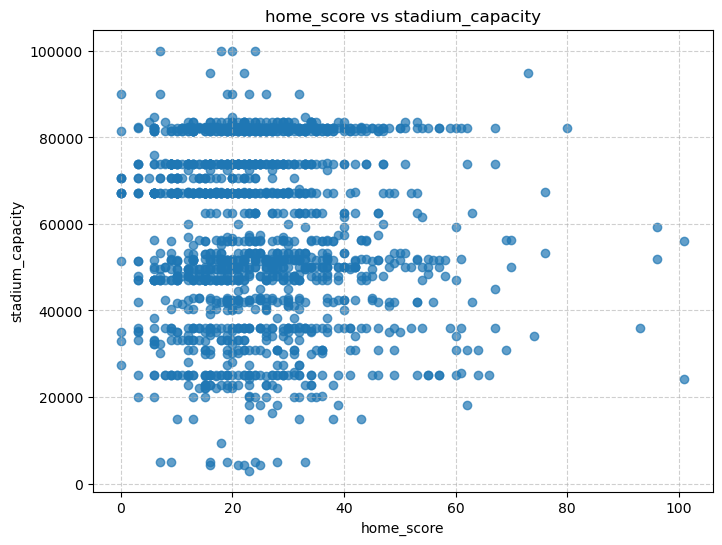

In [50]:
# Scatterplot -> "home_score" vs "stadium_capacity":
plt.figure(figsize=(8,6))
plt.scatter(wru_intermediate["home_score"], wru_intermediate["stadium_capacity"], alpha=0.7)
plt.xlabel("home_score")
plt.ylabel("stadium_capacity")
plt.title("home_score vs stadium_capacity")
plt.grid(True, linestyle="--", alpha=0.6)
        
plt.show()

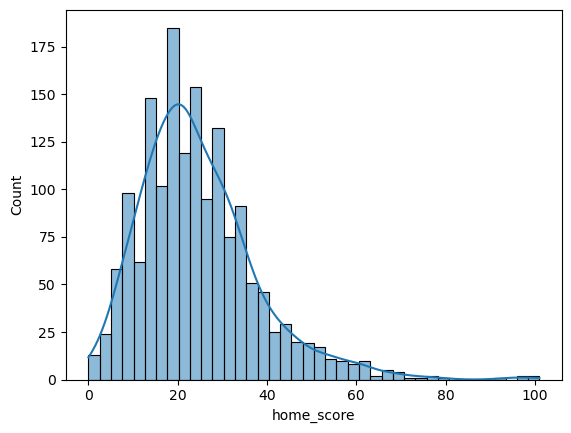

In [51]:
# Histplot "home_score":
sns.histplot(wru_intermediate["home_score"], kde=True)

plt.show()

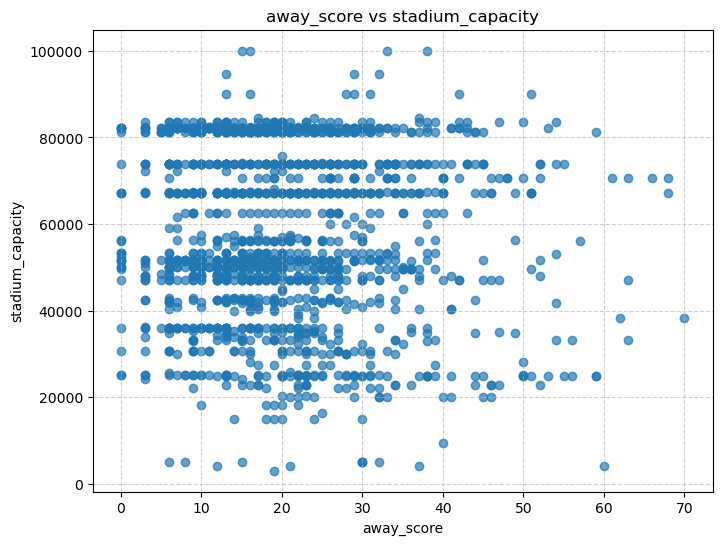

In [52]:
# Scatterplot "away_score" vs "stadium_capacity":
plt.figure(figsize=(8,6))
plt.scatter(wru_intermediate["away_score"], wru_intermediate["stadium_capacity"], alpha=0.7)
plt.xlabel("away_score")
plt.ylabel("stadium_capacity")
plt.title("away_score vs stadium_capacity")
plt.grid(True, linestyle="--", alpha=0.6)
        
plt.show()

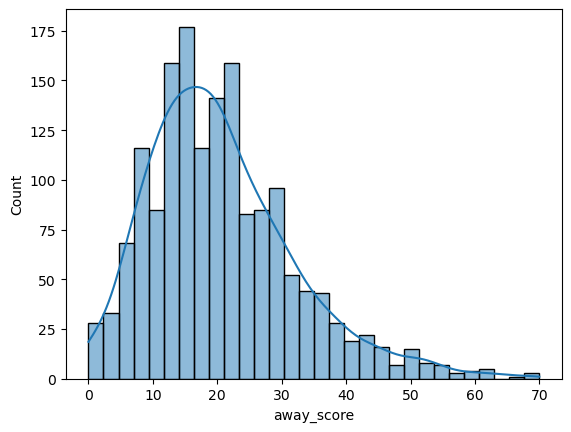

In [53]:
# Histplot "away_score":
sns.histplot(wru_intermediate["away_score"], kde=True)

plt.show()

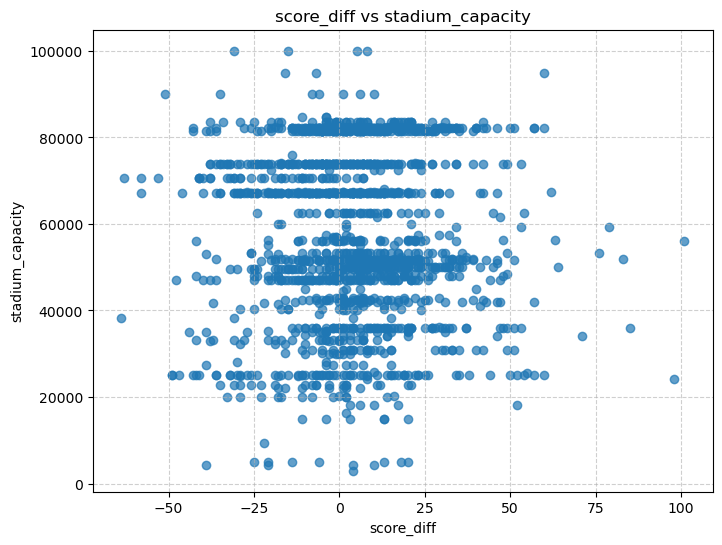

In [54]:
# Scatterplot "score_diff" vs "stadium_capacity":
plt.figure(figsize=(8,6))
plt.scatter(wru_intermediate["score_diff"], wru_intermediate["stadium_capacity"], alpha=0.7)
plt.xlabel("score_diff")
plt.ylabel("stadium_capacity")
plt.title("score_diff vs stadium_capacity")
plt.grid(True, linestyle="--", alpha=0.6)
        
plt.show()

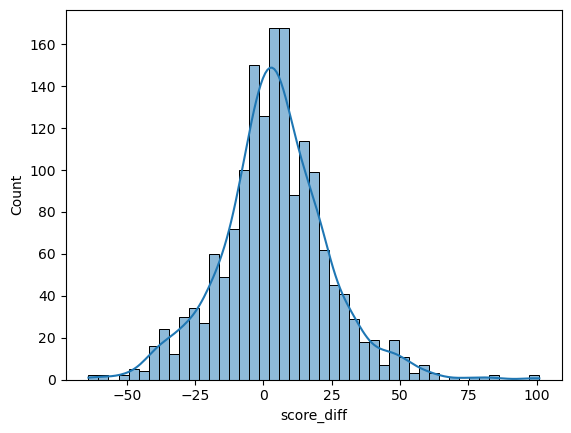

In [55]:
# Histplot "score_diff":
sns.histplot(wru_intermediate["score_diff"], kde=True)

plt.show()

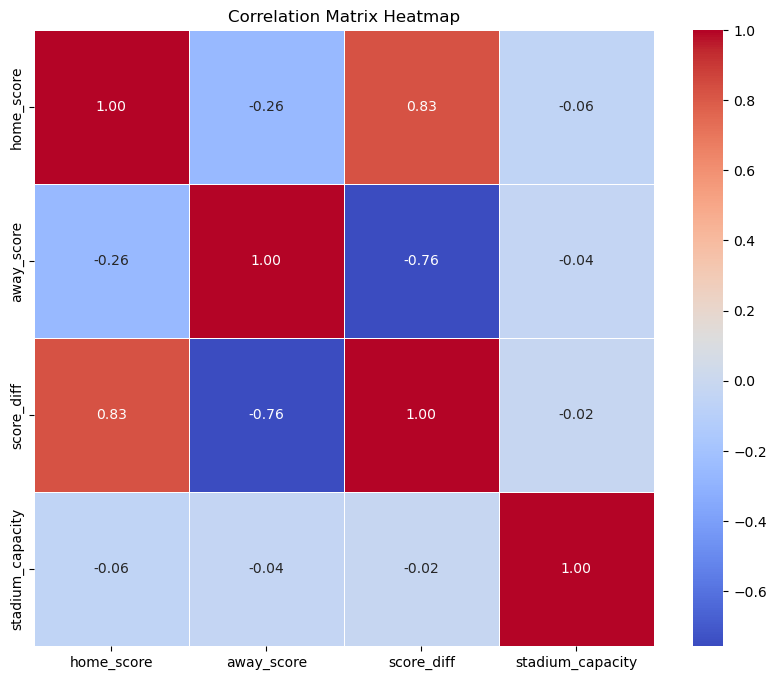

In [56]:
# Correlation matrix between numerical variables:
numerical = wru_intermediate.select_dtypes(include=[np.number])

plt.figure(figsize=(10,8))
sns.heatmap(numerical.corr(),
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            linewidths=0.5,
            cbar=True)
plt.title("Correlation Matrix Heatmap")

plt.show()

## Adding ***extra*** columns in the DataFrame for ***Machine Learning*** purposes

In [57]:
# Creating a new column for the jet-lag effect:
continents_dict = {"Argentina":"South America", "Australia":"Oceania", "England":"Europe", "France":"Europe", "Ireland":"Europe", 
                   "Italy":"Europe", "New Zealand":"Oceania", "Scotland":"Europe", "South Africa":"Africa", "Wales":"Europe"}

jet_lag = []

for z in range(len(wru_intermediate)):
    if wru_intermediate.loc[z, "neutral"] == False and wru_intermediate.loc[z, "world_cup"] == False:
        if continents_dict[wru_intermediate.loc[z, "away_team"]] != continents_dict[wru_intermediate.loc[z, "country"]]:
            jet_lag.append(True)
        else:
            jet_lag.append(False)
    else:
        jet_lag.append(False)

wru_intermediate["jet_lag"] = jet_lag

In [58]:
# Dropping rows before 2003 -> The first year with teams' WRU rankings:
wru_final = wru_intermediate[wru_intermediate["date"] >= "2003-01-01"].reset_index(drop=True)

In [59]:
# Creating columns of teams' ranking -home & away- for each year since 2003:
rankings_dict = {2003:{"Argentina": 7, "Australia": 3, "England": 1, "France": 4, "Ireland": 6,
                       "Italy": 11, "New Zealand": 2, "Scotland": 9, "South Africa": 5, "Wales": 8},

                 2004:{"Argentina": 7, "Australia": 2, "England": 3, "France": 5, "Ireland": 6,
                       "Italy": 11, "New Zealand": 1, "Scotland": 9, "South Africa": 4, "Wales": 8},

                 2005:{"Argentina": 8, "Australia": 4, "England": 5, "France": 3, "Ireland": 7,
                       "Italy": 12, "New Zealand": 1, "Scotland": 10, "South Africa": 2, "Wales": 6},

                 2006:{"Argentina": 6, "Australia": 3, "England": 7, "France": 2, "Ireland": 5,
                       "Italy": 12, "New Zealand": 1, "Scotland": 9, "South Africa": 4, "Wales": 8},

                 2007:{"Argentina": 3, "Australia": 5, "England": 4, "France": 6, "Ireland": 7,
                       "Italy": 11, "New Zealand": 2, "Scotland": 8, "South Africa": 1, "Wales": 10},

                 2008:{"Argentina": 4, "Australia": 3, "England": 6, "France": 7, "Ireland": 8,
                       "Italy": 11, "New Zealand": 1, "Scotland": 9, "South Africa": 2, "Wales": 5},

                 2009:{"Argentina": 7, "Australia": 3, "England": 6, "France": 5, "Ireland": 4,
                       "Italy": 11, "New Zealand": 1, "Scotland": 9, "South Africa": 2, "Wales": 8},

                 2010:{"Argentina": 8, "Australia": 2, "England": 4, "France": 6, "Ireland": 5,
                       "Italy": 12, "New Zealand": 1, "Scotland": 7, "South Africa": 3, "Wales": 9},

                 2011:{"Argentina": 7, "Australia": 2, "England": 5, "France": 3, "Ireland": 6,
                       "Italy": 12, "New Zealand": 1, "Scotland": 10, "South Africa": 4, "Wales": 8},

                 2012:{"Argentina": 8, "Australia": 3, "England": 5, "France": 4, "Ireland": 6,
                       "Italy": 10, "New Zealand": 1, "Scotland": 12, "South Africa": 2, "Wales": 9},

                 2013:{"Argentina": 10, "Australia": 3, "England": 4, "France": 5, "Ireland": 7,
                       "Italy": 13, "New Zealand": 1, "Scotland": 9, "South Africa": 2, "Wales": 6},

                 2014:{"Argentina": 9, "Australia": 5, "England": 4, "France": 7, "Ireland": 3,
                       "Italy": 14, "New Zealand": 1, "Scotland": 8, "South Africa": 2, "Wales": 6},

                 2015:{"Argentina": 5, "Australia": 2, "England": 8, "France": 7, "Ireland": 6,
                       "Italy": 12, "New Zealand": 1, "Scotland": 9, "South Africa": 3, "Wales": 4},

                 2016:{"Argentina": 9, "Australia": 3, "England": 2, "France": 8, "Ireland": 4,
                       "Italy": 13, "New Zealand": 1, "Scotland": 7, "South Africa": 6, "Wales": 5},

                 2017:{"Argentina": 8, "Australia": 4, "England": 2, "France": 9, "Ireland": 3,
                       "Italy": 14, "New Zealand": 1, "Scotland": 5, "South Africa": 6, "Wales": 7},

                 2018:{"Argentina": 10, "Australia": 6, "England": 4, "France": 9, "Ireland": 2,
                       "Italy": 15, "New Zealand": 1, "Scotland": 7, "South Africa": 5, "Wales": 3},

                 2019:{"Argentina": 10, "Australia": 6, "England": 3, "France": 7, "Ireland": 5,
                       "Italy": 12, "New Zealand": 2, "Scotland": 9, "South Africa": 1, "Wales": 4},

                 2020:{"Argentina": 8, "Australia": 6, "England": 2, "France": 4, "Ireland": 5,
                       "Italy": 14, "New Zealand": 3, "Scotland": 7, "South Africa": 1, "Wales": 9},

                 2021:{"Argentina": 9, "Australia": 6, "England": 3, "France": 5, "Ireland": 4,
                       "Italy": 14, "New Zealand": 2, "Scotland": 7, "South Africa": 1, "Wales": 8},

                 2022:{"Argentina": 8, "Australia": 6, "England": 5, "France": 2, "Ireland": 1,
                       "Italy": 12, "New Zealand": 3, "Scotland": 7, "South Africa": 4, "Wales": 9},

                 2023:{"Argentina": 7, "Australia": 9, "England": 5, "France": 4, "Ireland": 2,
                       "Italy": 11, "New Zealand": 3, "Scotland": 6, "South Africa": 1, "Wales": 8},

                 2024:{"Argentina": 5, "Australia": 8, "England": 7, "France": 4, "Ireland": 2,
                       "Italy": 10, "New Zealand": 3, "Scotland": 6, "South Africa": 1, "Wales": 11}}



wru_final["home_ranking"] = wru_final.apply(lambda x: rankings_dict.get(x["date"].year, {}).get(x["home_team"], None), axis=1)
wru_final["away_ranking"] = wru_final.apply(lambda x: rankings_dict.get(x["date"].year, {}).get(x["away_team"], None), axis=1)

In [60]:
wru_final.sample(7)

,date,home_team,away_team,home_score,away_score,country,neutral,world_cup,score_diff,competition_cleaned,stadium_name,stadium_city,stadium_capacity,jet_lag,home_ranking,away_ranking
52,2003-11-15,Australia,New Zealand,22,10,Australia,False,True,12,Rugby World Cup,Accor Stadium,Sydney,83500,False,3,2
1035,2023-10-20,Argentina,New Zealand,6,44,France,True,True,-38,Rugby World Cup,Stade de France,Saint-Avold,81338,False,7,3
336,2009-11-14,Italy,New Zealand,6,20,Italy,False,False,-14,Test Matches,Stadio San Siro,Milan,75817,True,11,1
684,2016-08-27,New Zealand,Australia,29,9,New Zealand,False,False,20,Rugby Championship,Sky Stadium,Wellington,36000,False,1,3
722,2017-03-18,France,Wales,20,18,France,False,False,2,Six Nations,Stade de France,Saint-Avold,81338,False,9,7
900,2021-02-27,Wales,England,40,24,Wales,False,False,16,Six Nations,Principality Stadium,Cardiff,73931,False,8,3
242,2007-10-13,France,England,9,14,France,False,True,-5,Rugby World Cup,Stade de France,Saint-Avold,81338,False,6,4


In [61]:
wru_final.describe()

,date,home_score,away_score,score_diff,stadium_capacity,home_ranking,away_ranking
count,1089,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2013-12-06 14:59:10.413222912,24.542700,20.756657,3.786042,60047.054178,5.533517,5.512397
min,2003-02-15 00:00:00,0.000000,0.000000,-63.000000,4177.000000,1.000000,1.000000
25%,2008-06-28 00:00:00,16.000000,13.000000,-6.000000,49540.000000,3.000000,3.000000
50%,2013-11-17 00:00:00,23.000000,19.000000,4.000000,62567.000000,5.000000,5.000000
75%,2019-02-02 00:00:00,31.000000,27.000000,15.000000,73931.000000,8.000000,8.000000
max,2024-11-30 00:00:00,96.000000,68.000000,79.000000,100024.000000,15.000000,15.000000
std,NaN,12.382991,11.330452,18.953289,19024.467869,3.270724,3.312754


## Starting a ***Machine Learning*** model 

In [62]:

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [63]:
# Renaming some columns' names:
wru_final.rename(columns={"competition_cleaned": "competition", "stadium_name": "stadium", "stadium_city": "city", "stadium_capacity": "capacity"}, inplace=True)

In [64]:
# Creating a new column "home_win", which is gonna be the target (y) of the model:
home_win = []

for z in wru_final["score_diff"]:
    if z > 0:
        home_win.append(True)
    else:
        home_win.append(False)

wru_final["home_win"] = home_win

In [65]:
# Getting dummies for column "competition":
wru_final = pd.get_dummies(wru_final, columns=["competition"], drop_first=True)

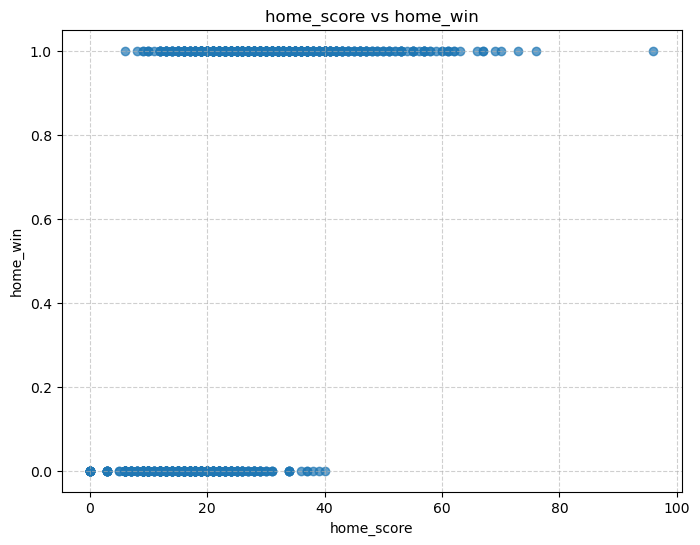

In [66]:
# Scatterplot "home_score" vs "home_win":
plt.figure(figsize=(8,6))
plt.scatter(wru_final["home_score"], wru_final["home_win"], alpha=0.7)
plt.xlabel("home_score")
plt.ylabel("home_win")
plt.title("home_score vs home_win")
plt.grid(True, linestyle="--", alpha=0.6)
        
plt.show()

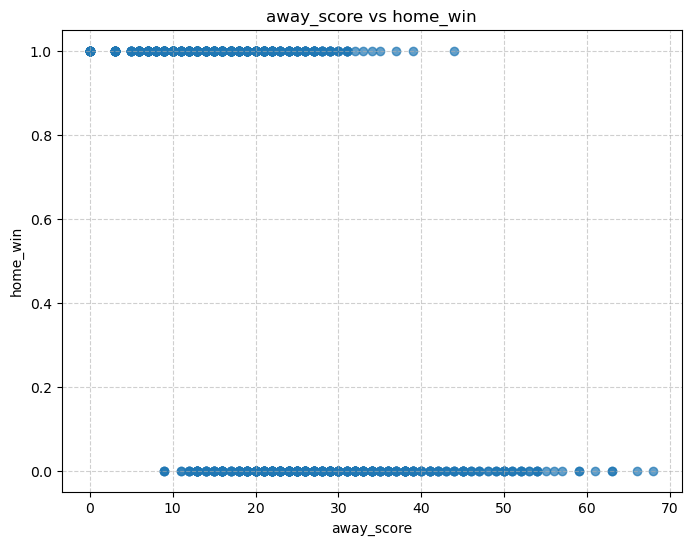

In [67]:
# Scatterplot "away_score" vs "home_win":
plt.figure(figsize=(8,6))
plt.scatter(wru_final["away_score"], wru_final["home_win"], alpha=0.7)
plt.xlabel("away_score")
plt.ylabel("home_win")
plt.title("away_score vs home_win")
plt.grid(True, linestyle="--", alpha=0.6)
        
plt.show()

In [68]:
# Getting a reference % to be beaten with the Machine Learning model:
ratio_win = (wru_final["home_win"].sum()/wru_final["home_win"].value_counts().sum())
print(f"The score to be beaten with the Machine Learning model is: {ratio_win:.2%}")

The score to be beaten with the Machine Learning model is: 59.32%


### Applying a ***Logistics Regression*** model

In [69]:
# Creating DataFrame to apply the Logistics Regression model:
wru_lr = wru_final.copy()
wru_lr.drop(columns=["date", "home_team", "away_team", "away_score", "world_cup", "score_diff", "country", "stadium", "city"], inplace=True)

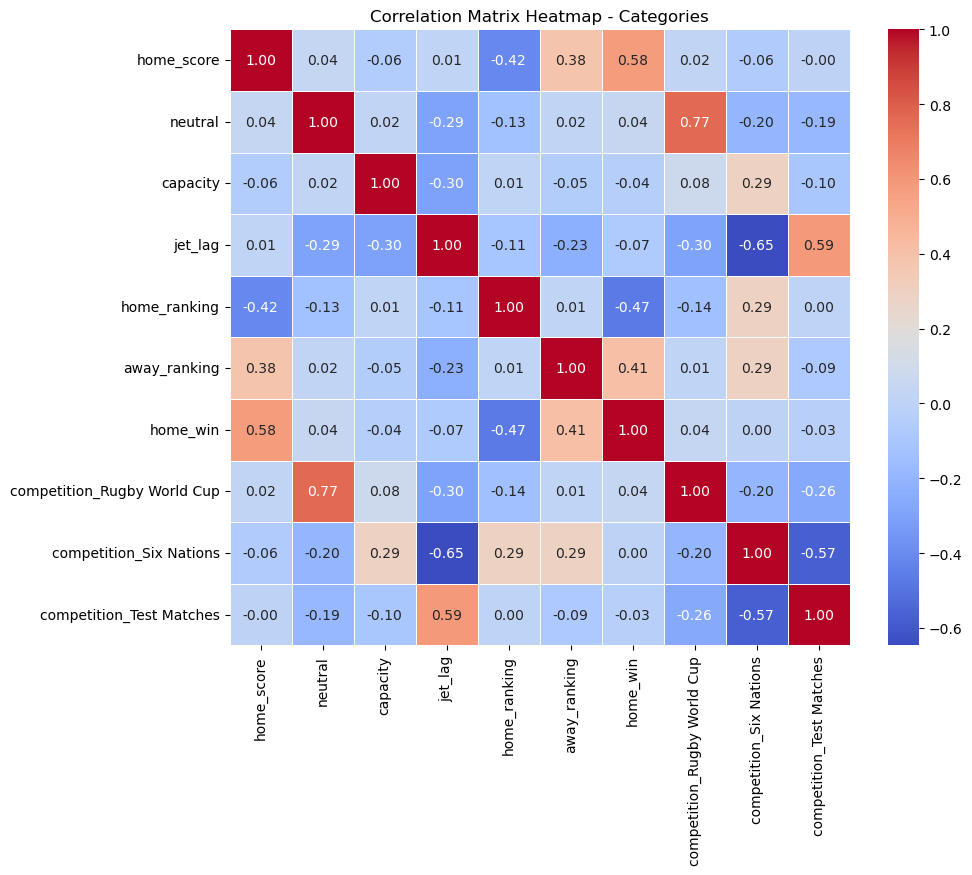

In [70]:
# Correlation matrix between categories:
plt.figure(figsize=(10, 8))
sns.heatmap(wru_lr.corr(),
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            linewidth=0.5,
            cbar=True)
plt.title('Correlation Matrix Heatmap - Categories')

plt.show()

In [71]:
# Defining independent variables (X) and the dependent variable (y):
X = wru_lr.drop("home_win", axis=1)
y = wru_lr["home_win"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)   
# "stratify" parameter helps to keep a proportion in "y" (structure is kept!!!)

In [72]:
# Initializing and training the Logistics Regressor:
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)     

LogisticRegression(random_state=42)

In [73]:
# Evaluating the model:
accuracy_lr = model_lr.score(X_test, y_test)
print("Accuracy of Logistics Regressor:", accuracy_lr)

Accuracy of Logistics Regressor: 0.8302752293577982


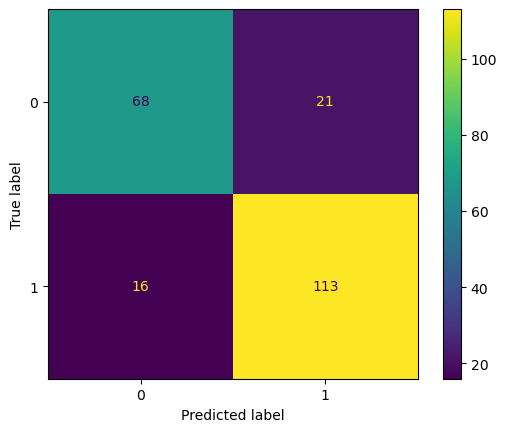

In [74]:
# Confusion matrix:
y_predicted = model_lr.predict(X_test)

cm = confusion_matrix(y_test, y_predicted)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

In [75]:
# Metrics:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

       False       0.81      0.76      0.79        89
        True       0.84      0.88      0.86       129

    accuracy                           0.83       218
   macro avg       0.83      0.82      0.82       218
weighted avg       0.83      0.83      0.83       218



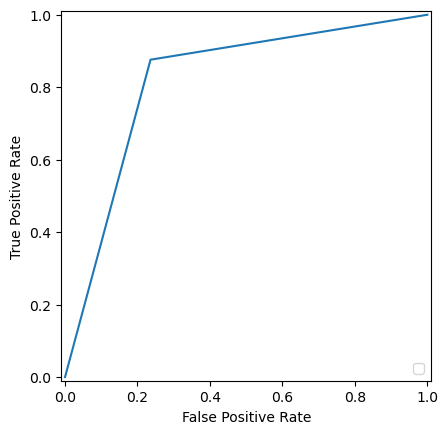

In [76]:
# ROC curve:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted)
display = RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()

plt.show()

### Making ***predictions***

Order of the metrics of the modified model:
- `home_score`
- `neutral`
- `capacity`
- `jet_lag`
- `home_ranking`
- `away_ranking`
- `competition_Rugby World Cup`
- `competition_Six Nations`
- `competition_Test Matches`

In [77]:
winning_true = [[42, 0, 85000, 0, 3, 9, 1, 0, 0]]

In [78]:
# Most probable Outcome -> Home Win:
model_lr.predict(winning_true)[0]

True

In [79]:
# Percentage of Home Win:
model_lr.predict_proba(winning_true)[0][1]

0.9943347877769905

In [80]:
winning_false = [[25, 0, 35000, 1, 7, 2, 0, 0, 0]]

In [81]:
# Most probable Outcome -> Home Win:
model_lr.predict(winning_false)[0]

False

In [82]:
# Percentage of Home Win:
model_lr.predict_proba(winning_false)[0][1]

0.384672077755374

### Applying a ***KNN*** model to compare with the previous ***Logistics Regression*** model

In [83]:
# Creating DataFrame to apply the KNN model:
wru_knn = wru_final.copy()
wru_knn.drop(columns=["date", "home_team", "away_team", "away_score", "world_cup", "score_diff", "country", "stadium", "city"], inplace=True)

In [84]:
# Defining independent variables (X) and the dependent variable (y):
x = wru_knn.drop("home_win", axis=1)
Y = wru_knn["home_win"]

# Standardizing column "home_score":
scaler_standard = StandardScaler()
x["home_score"] = scaler_standard.fit_transform(x[["home_score"]])

X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, stratify=Y, random_state=42)

# Initializing and training the KNN Classifier:
model_knn = KNeighborsClassifier(n_neighbors=7)
model_knn.fit(X_train, y_train)

# Evaluating the model:
accuracy_knn = model_knn.score(X_test, y_test)
print("Accuracy of KNN Classifier:", accuracy_knn)

Accuracy of KNN Classifier: 0.7889908256880734


#### The KNN model has the highest score with 7 neighbours; but it doesn't beat the Logistics Regression's score!!!

## Some more **insights** out of the **dataset**

In [85]:
# Split of jet-lag effect by country:
pd.crosstab(wru_final["away_team"], wru_final["jet_lag"], values=wru_final["jet_lag"], aggfunc="count")

jet_lag,False,True
away_team,,
Argentina,16,85
Australia,41,92
England,70,35
France,72,37
Ireland,72,28
Italy,79,15
New Zealand,40,84
Scotland,75,19
South Africa,14,111


In [86]:
# Count of matches played by both "home_team" and "away_team":
pd.crosstab(wru_final["home_team"], wru_final["away_team"], margins=True).replace(0, "-")

away_team,Argentina,Australia,England,France,Ireland,Italy,New Zealand,Scotland,South Africa,Wales,All
home_team,,,,,,,,,,,
Argentina,-,12,6,9,5,6,12,11,14,6,81
Australia,13,-,14,10,8,5,30,6,25,11,122
England,10,15,-,16,14,12,12,12,17,18,126
France,12,9,16,-,15,15,10,15,7,12,111
Ireland,10,9,13,12,-,18,10,15,8,15,110
Italy,9,7,11,11,11,-,7,14,5,12,87
New Zealand,16,33,10,16,11,4,-,-,24,8,122
Scotland,5,10,11,14,14,16,8,-,9,11,98
South Africa,16,21,8,7,8,5,24,8,-,11,108


In [87]:
# Count of "home_win" by "home_team" and "away_team":
pd.crosstab(wru_final["home_team"], wru_final["away_team"], values=wru_final["home_win"], aggfunc="sum").replace(np.nan, "-")

away_team,Argentina,Australia,England,France,Ireland,Italy,New Zealand,Scotland,South Africa,Wales
home_team,,,,,,,,,,
Argentina,-,3.0,1.0,6.0,3.0,4.0,0.0,5.0,3.0,3.0
Australia,9.0,-,5.0,9.0,6.0,5.0,10.0,4.0,18.0,10.0
England,8.0,9.0,-,13.0,9.0,12.0,2.0,9.0,6.0,15.0
France,8.0,6.0,12.0,-,10.0,14.0,3.0,14.0,3.0,8.0
Ireland,9.0,6.0,9.0,6.0,-,18.0,3.0,14.0,6.0,11.0
Italy,0.0,1.0,0.0,2.0,1.0,-,0.0,5.0,1.0,2.0
New Zealand,13.0,32.0,9.0,14.0,9.0,4.0,-,-,18.0,8.0
Scotland,3.0,4.0,5.0,6.0,4.0,14.0,0.0,-,1.0,4.0
South Africa,15.0,16.0,6.0,5.0,5.0,5.0,11.0,8.0,-,9.0


In [88]:
# Sum of "score_diff" by "home_team" and "away_team":
pd.crosstab(wru_final["home_team"], wru_final["away_team"], values=wru_final["score_diff"], aggfunc="sum").replace(np.nan, "-")

away_team,Argentina,Australia,England,France,Ireland,Italy,New Zealand,Scotland,South Africa,Wales
home_team,,,,,,,,,,
Argentina,-,-63.0,-69.0,-26.0,15.0,51.0,-295.0,-54.0,-150.0,-20.0
Australia,102.0,-,44.0,135.0,65.0,132.0,-194.0,51.0,109.0,93.0
England,116.0,87.0,-,126.0,92.0,329.0,-59.0,159.0,-95.0,172.0
France,26.0,28.0,57.0,-,84.0,319.0,-124.0,212.0,3.0,69.0
Ireland,105.0,3.0,48.0,35.0,-,497.0,-78.0,214.0,73.0,194.0
Italy,-114.0,-86.0,-237.0,-248.0,-224.0,-,-272.0,-64.0,-107.0,-192.0
New Zealand,292.0,547.0,141.0,328.0,198.0,225.0,-,-,287.0,215.0
Scotland,11.0,-22.0,-26.0,-60.0,-121.0,233.0,-181.0,-,-136.0,-12.0
South Africa,288.0,216.0,94.0,97.0,30.0,166.0,-68.0,142.0,-,121.0


In [89]:
# Min, Max and Mean score by "home_team":
wru_final.groupby(by="home_team").agg({"home_score":["min", "max", "mean"]}).round(2)

home_score           
                    min max   mean
home_team                         
Argentina             0  67  20.79
Australia             5  69  25.44
England               0  62  25.78
France                3  60  25.23
Ireland               3  61  25.56
Italy                 0  31  14.66
New Zealand           8  96  33.60
Scotland              0  53  18.64
South Africa          0  73  29.26
Wales                 3  67  21.92

In [90]:
# Min, Max and Mean score by "away_team":
wru_final.groupby(by="away_team").agg({"away_score":["min", "max", "mean"]}).round(2)

away_score           
                    min max   mean
away_team                         
Argentina             3  50  18.02
Australia             0  59  21.08
England               3  52  20.71
France                0  56  20.51
Ireland               0  63  20.78
Italy                 0  37  12.77
New Zealand           5  68  30.55
Scotland              3  44  17.13
South Africa          0  63  22.51
Wales                 0  61  19.99

In [91]:
# Percentage of both "home_win" and "away_win" by stadium's "capacity":
cross = pd.crosstab(wru_final["capacity"], wru_final["home_win"], normalize="index")*100
cross = cross.round(2).rename(columns={True:"home_win_%", False:"away_win_%"})
cross

home_win,away_win_%,home_win_%
capacity,,
4177,100.00,0.00
14870,66.67,33.33
16300,0.00,100.00
18185,0.00,100.00
18196,0.00,100.00
...,...,...
82300,35.71,64.29
83500,44.12,55.88
90000,0.00,100.00


In [92]:
# Min, Max and Mean "score_diff" by "home_team", and each "away_team":
wru_final.groupby(by=["home_team", "away_team"]).agg({"score_diff":["min", "max", "mean"]}).round(2)

score_diff           
                              min max   mean
home_team away_team                         
Argentina Australia           -37  40  -5.25
          England             -29   2 -11.50
          France              -39  28  -2.89
          Ireland             -12  16   3.00
          Italy                -1  18   8.50
...                           ...  ..    ...
Wales     Ireland             -24  18   0.64
          Italy                -3  53  20.31
          New Zealand         -38  -1 -21.73
          Scotland             -4  48  12.38
          South Africa        -36  14  -8.50

[89 rows x 3 columns]

# That's all folks!!!!!